In [2]:
#Importando librerías
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv

In [5]:
#Este comando funciona una vez que se instala citipy, para ello hay que correr este comando en git bash o en anaconda prompt
#pip install citipy
#con este comando llamamos la API Key-previamente solicitada en la página https://openweathermap.org/api
from citipy import citipy

# 1.-Crear la base de datos nombre de ciudad, lat-lon

In [ ]:
#establecemos el archivo de salida 
resultados="ciudadesh6.csv"

In [6]:
#creamos dos listas vacias que contendran los datos de longitud, latitud y nombre de las ciudades
lat_lng=[]
lat=[]
long=[]
cities=[]
#con este código se generar aleatoriamente números que serán utilizados como datos de latitud y longitud para 500 ciudades
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
#utilizando citipy identificamos el nombre de la ciudad más cercana a los datos aleatorios proporcionados por lats y lngs
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
#solo se añaden ciudades que no están en la lista previamente 
    if city not in cities:
        cities.append(city)
        lat.append(lat_lng[0])
        long.append(lat_lng[1])
print (cities)


['luanda', 'ayabaca', 'qaanaaq', 'hasaki', 'hithadhoo', 'punta arenas', 'touros', 'chuy', 'atuona', 'williams lake', 'busselton', 'hobart', 'ipua', 'oistins', 'avarua', 'esperance', 'santa isabel do rio negro', 'vaini', 'cape town', 'kampot', 'leh', 'faya', 'kruisfontein', 'lata', 'mataura', 'kahului', 'albany', 'souillac', 'rosario', 'saint-francois', 'south venice', 'kavieng', 'butaritari', 'jamame', 'kapaa', 'sao filipe', 'khatanga', 'husavik', 'bagdarin', 'kabanjahe', 'saldanha', 'valleyview', 'jamestown', 'hermanus', 'richards bay', 'puerto ayora', 'silver city', 'ust-kamchatsk', 'along', 'vytegra', 'huambo', 'port-gentil', 'nikolskoye', 'yavas', 'taolanaro', 'grand river south east', 'chuncheng', 'blytheville', 'ushuaia', 'cap malheureux', 'sibolga', 'dikson', 'castro', 'bairiki', 'samusu', 'anadyr', 'saint-augustin', 'pare', 'pathein', 'karauzyak', 'barrow', 'new norfolk', 'cervo', 'akyab', 'puerto escondido', 'a', 'saskylakh', 'palabuhanratu', 'quelimane', 'port alfred', 'clyde

In [7]:
print(cities[0])

luanda


# 2.-Hacer la consulta del clima de cada ciudad que aparece en la base que construimos

In [8]:
url="http://api.openweathermap.org/data/2.5/weather?"

In [9]:
api_key=""

In [10]:
query_url =url + "appid=" + api_key + "&q="
#f"{url}appid={api_key}&q="

In [11]:
for citi in cities:
    print (citi)

luanda
ayabaca
qaanaaq
hasaki
hithadhoo
punta arenas
touros
chuy
atuona
williams lake
busselton
hobart
ipua
oistins
avarua
esperance
santa isabel do rio negro
vaini
cape town
kampot
leh
faya
kruisfontein
lata
mataura
kahului
albany
souillac
rosario
saint-francois
south venice
kavieng
butaritari
jamame
kapaa
sao filipe
khatanga
husavik
bagdarin
kabanjahe
saldanha
valleyview
jamestown
hermanus
richards bay
puerto ayora
silver city
ust-kamchatsk
along
vytegra
huambo
port-gentil
nikolskoye
yavas
taolanaro
grand river south east
chuncheng
blytheville
ushuaia
cap malheureux
sibolga
dikson
castro
bairiki
samusu
anadyr
saint-augustin
pare
pathein
karauzyak
barrow
new norfolk
cervo
akyab
puerto escondido
a
saskylakh
palabuhanratu
quelimane
port alfred
clyde river
menongue
terra santa
iqaluit
pando
provideniya
petropavlovsk-kamchatskiy
chicama
dalinghe
ahipara
mullaitivu
tomatlan
wulanhaote
airai
mitsamiouli
lebu
bubaque
santa maria
cidreira
fortuna
dunedin
guerrero negro
broome
tilichiki
bredas

In [13]:
cityname=[]
count=[]
lati=[]
long=[]
temp=[]
hum=[]
cloud=[]
wsp=[]
datas=[]
for citi in cities:
    response = requests.get(query_url + citi)
    if response.status_code == 200:
                data=response.json()
                datas.append(data)
                names=data["name"]
                cityname.append(names)
                country=data["sys"]["country"]
                count.append(country)
                latitud=data["coord"]["lat"]
                lati.append(latitud)
                longit=data["coord"]["lon"]
                long.append(longit)
                tempr=data["main"]["temp"]
                temp.append(tempr)
                hm=data["main"]["humidity"]
                hum.append(hm)
                cl=data["clouds"]["all"]
                cloud.append(cl)
                wind=data["wind"]["speed"]
                wsp.append(wind)
                #print ("cityname")
                for x in range(len(cityname)):
                    print(f"Making request number: {x} for ID: {cityname[x]}")
    elif response.status_code == 404:
                 print("ciudad no encontrada")
            

Making request number: 0 for ID: Luanda
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request nu

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for 

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
ciudad no encontrada
ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making r

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

ciudad no encontrada
Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Mak

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

Making request number: 0 for ID: Luanda
Making request number: 1 for ID: Ayabaca
Making request number: 2 for ID: Qaanaaq
Making request number: 3 for ID: Hasaki
Making request number: 4 for ID: Hithadhoo
Making request number: 5 for ID: Punta Arenas
Making request number: 6 for ID: Touros
Making request number: 7 for ID: Chuy
Making request number: 8 for ID: Atuona
Making request number: 9 for ID: Williams Lake
Making request number: 10 for ID: Busselton
Making request number: 11 for ID: Hobart
Making request number: 12 for ID: Ipua
Making request number: 13 for ID: Oistins
Making request number: 14 for ID: Avarua
Making request number: 15 for ID: Esperance
Making request number: 16 for ID: Santa Isabel do Rio Negro
Making request number: 17 for ID: Vaini
Making request number: 18 for ID: Cape Town
Making request number: 19 for ID: Kampot
Making request number: 20 for ID: Leh
Making request number: 21 for ID: Faya
Making request number: 22 for ID: Kruisfontein
Making request number: 2

In [14]:
#Creamos el data frame a partir de los datos obtenidos en las listas [] del loop
citiesdf = pd.DataFrame(list(zip(cityname,count,lati,long,temp,hum,cloud,wsp)), 
               columns =['City','Country','Latitude','Longitude','Temperature','Humidity','Cloud','Winter_Speed']) 

In [15]:
citiesdf

City Country  Latitude  Longitude  Temperature  \
0                       Luanda      AO     -8.83      13.24       298.15   
1                      Ayabaca      PE     -4.64     -79.72       303.30   
2                      Qaanaaq      GL     77.48     -69.36       278.50   
3                       Hasaki      JP     35.73     140.83       289.90   
4                    Hithadhoo      MV     -0.60      73.08       302.40   
5                 Punta Arenas      CL    -53.16     -70.91       276.08   
6                       Touros      BR     -5.20     -35.46       298.15   
7                         Chuy      UY    -33.69     -53.46       286.90   
8                       Atuona      PF     -9.80    -139.03       300.00   
9                Williams Lake      CA     52.13    -122.14       287.15   
10                   Busselton      AU    -33.64     115.35       282.20   
11                      Hobart      AU    -42.88     147.33       282.04   
12                        Ipua      BR    -20.44     -48.01       298.30   
13                     Oistins      BB     13.07     -59.53       304.15   
14                      Avarua      CK    -21.21    -159.78       292.15   
15                   Esperance      AU    -33.86     121.89       284.15   
16   Santa Isabel do Rio Negro      BR     -0.41     -65.02       300.40   
17                       Vaini      IN     15.34      74.49       298.80   
18                   Cape Town      ZA    -33.93      18.42       285.86   
19                      Kampot      KH     10.62     104.18       299.73   
20                         Leh      IN     34.16      77.58       279.20   
21                        Faya      SA     18.39      42.45       298.18   
22                Kruisfontein      ZA    -34.00      24.73       283.80   
23                        Lata      IN     30.78      78.62       281.90   
24                     Mataura      NZ    -46.19     168.86       281.60   
25                     Kahului      US     20.89    -156.47       297.01   
26                      Albany      US     42.65     -73.75       302.08   
27                    Souillac      FR     45.60      -0.60       302.30   
28                     Rosario      UY    -34.31     -57.35       289.21   
29              Saint-Francois      FR     46.42       3.91       298.58   
..                         ...     ...       ...        ...          ...   
523                     Harper      US     30.30     -99.24       307.04   
524                   Ellisras      ZA    -23.67      27.74       287.70   
525               Ornskoldsvik      SE     63.29      18.72       287.70   
526                   Sorrento      AU    -31.82     115.75       284.33   
527                       Juba      EE     57.82      26.93       288.50   
528                      Gayny      RU     60.30      54.33       286.20   
529                   Acapulco      MX     16.86     -99.88       303.15   
530                   Sobolevo      RU     54.43      31.90       285.60   
531                     Sabang      PH     13.80     121.11       296.30   
532                 San Felipe      CL    -32.75     -70.73       287.59   
533                   San Luis      AR    -33.30     -66.34       291.30   
534                     Norsup      VU    -16.07     167.38       298.00   
535                   Shibetsu      JP     44.15     142.46       286.20   
536                Zhangjiakou      CN     40.77     114.88       287.10   
537                    Chapais      CA     49.78     -74.86       295.15   
538                       Okha      RU     53.59     142.95       284.40   
539                  Shaunavon      CA     49.65    -108.41       295.50   
540                       Aksu      KZ     52.04      76.93       287.15   
541                    Sabinov      SK     49.10      21.10       288.82   
542                   Chapleau      CA     47.85     -83.40       297.15   
543                    Porkhov      RU     57.77      29.55       289.15  

In [2]:
#Pasamos el dataframe a un archivo csv
citiesdf.to_csv('outputciudades.csv')

NameError: name 'citiesdf' is not defined

In [4]:
#leemos el csv 
citiesdf= pd.read_csv('outputciudades.csv')

In [5]:
citiesdf.head()

Unnamed: 0       City Country  Latitude  Longitude  Temperature  Humidity  \
0           0     Luanda      AO     -8.83      13.24       298.15        73   
1           1    Ayabaca      PE     -4.64     -79.72       303.30        35   
2           2    Qaanaaq      GL     77.48     -69.36       278.50        71   
3           3     Hasaki      JP     35.73     140.83       289.90        88   
4           4  Hithadhoo      MV     -0.60      73.08       302.40        72   

   Cloud  Winter_Speed  
0     51          2.60  
1      0          3.98  
2     27          0.52  
3     75          3.10  
4     86          3.88

In [4]:
citiesdf.dtypes

Unnamed: 0        int64
City             object
Country          object
Latitude        float64
Longitude       float64
Temperature     float64
Humidity          int64
Cloud             int64
Winter_Speed    float64
dtype: object

In [19]:
citiesdf.count()

City            553
Country         553
Latitude        553
Longitude       553
Temperature     553
Humidity        553
Cloud           553
Winter_Speed    553
dtype: int64

# 3.-Análisis de datos de las ciudades 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [21]:
citiesdf.describe()

Latitude   Longitude  Temperature   Humidity       Cloud  \
count  553.000000  553.000000   553.000000  553.00000  553.000000   
mean    20.056962   20.788698   293.830199   68.23689   47.117541   
std     33.386812   89.521983     7.635731   23.93999   37.423627   
min    -54.810000 -173.230000   272.800000    5.00000    0.000000   
25%     -7.840000  -60.230000   288.150000   54.00000    4.000000   
50%     22.890000   23.040000   294.060000   72.00000   40.000000   
75%     49.180000  101.770000   299.770000   86.00000   82.000000   
max     78.220000  179.320000   319.150000  290.00000  100.000000   

       Winter_Speed  
count    553.000000  
mean       3.448373  
std        2.312168  
min        0.060000  
25%        1.720000  
50%        3.040000  
75%        4.600000  
max       13.270000

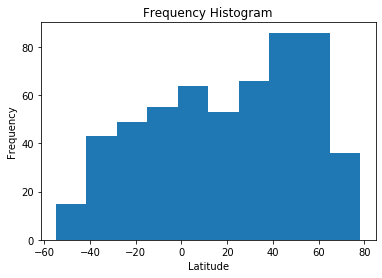

In [22]:
#Creamos un histograma de la Latitud para ver cómo se comporta la variable
%matplotlib inline
x=citiesdf["Latitude"]
plt.hist(x, bins=10)
plt.gca().set(title='Frequency Histogram', xlabel='Latitude',ylabel='Frequency');

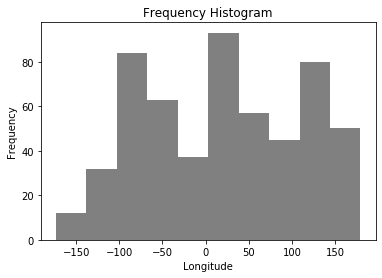

In [23]:
#Creamos un histograma de la Longitud para ver cómo se comporta la variable
%matplotlib inline
x=citiesdf["Longitude"]
plt.hist(x, bins=10,color="grey")
plt.gca().set(title='Frequency Histogram', xlabel='Longitude',ylabel='Frequency');

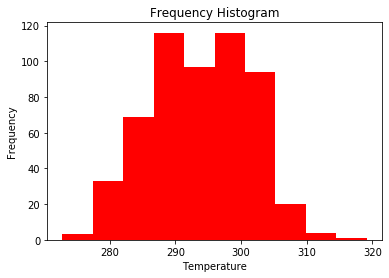

In [24]:
#Creamos un histograma de la Temperatura para ver cómo se comporta la variable
%matplotlib inline
x=citiesdf["Temperature"]
plt.hist(x, bins=10, color="red")
plt.gca().set(title='Frequency Histogram', xlabel='Temperature',ylabel='Frequency');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


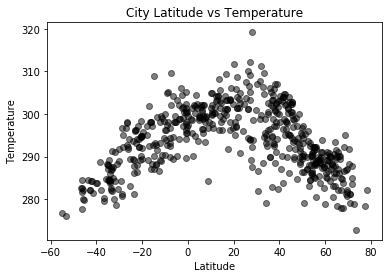

In [25]:
#Creamos un scatter de la Temperatura y la Latitud
x=citiesdf["Latitude"]
y=citiesdf["Temperature"]
colors = (0,0,0)
plt.scatter(x, y,  c=colors, alpha=0.5)
plt.title('City Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()


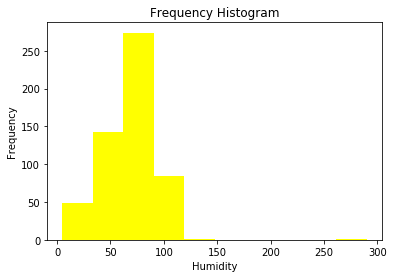

In [26]:
#Creamos un Histograma  de  Humidity
%matplotlib inline
x=citiesdf["Humidity"]
plt.hist(x, bins=10, color="yellow")
plt.gca().set(title='Frequency Histogram', xlabel='Humidity',ylabel='Frequency');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


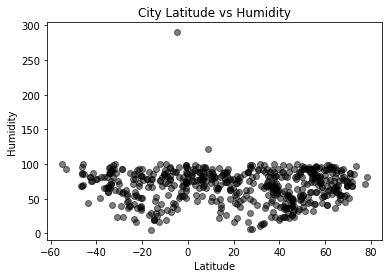

In [27]:
#Creamos un scatter de la Humidity y la Latitud
x=citiesdf["Latitude"]
y=citiesdf["Humidity"]
colors = (0,0,0)
plt.scatter(x, y,  c=colors, alpha=0.5)
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()


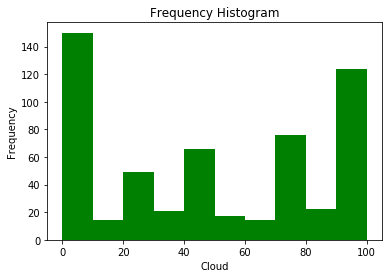

In [28]:
#Histograma de Cloudiness
%matplotlib inline
x=citiesdf["Cloud"]
plt.hist(x, bins=10, color="green")
plt.gca().set(title='Frequency Histogram', xlabel='Cloud',ylabel='Frequency');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


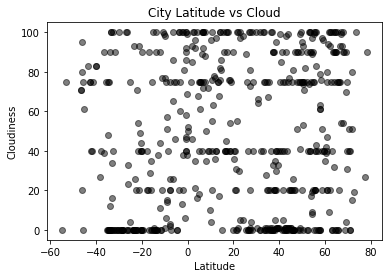

In [29]:
#Scatter Cloudiness y Latitude
x=citiesdf["Latitude"]
y=citiesdf["Cloud"]
colors = (0,0,0)
plt.scatter(x, y,  c=colors, alpha=0.5)
plt.title('City Latitude vs Cloud')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

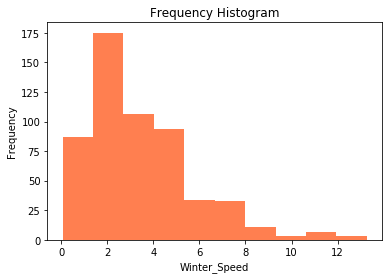

In [30]:
#Histograma de WinterSpeed
%matplotlib inline
x=citiesdf["Winter_Speed"]
plt.hist(x, bins=10, color="coral")
plt.gca().set(title='Frequency Histogram', xlabel='Winter_Speed',ylabel='Frequency');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


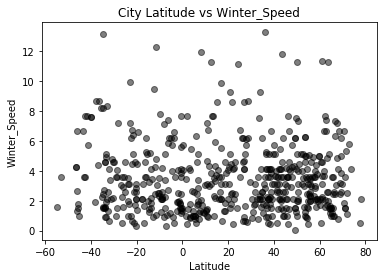

In [31]:
#Scatter Winter_Speed y Latitude
x=citiesdf["Latitude"]
y=citiesdf["Winter_Speed"]
colors = (0,0,0)
plt.scatter(x, y,  c=colors, alpha=0.5)
plt.title('City Latitude vs Winter_Speed')
plt.xlabel('Latitude')
plt.ylabel('Winter_Speed')
plt.show()